<a href="https://colab.research.google.com/github/gumendes/projeto_idosos_atividade_fisica/blob/main/03_modelo_preditivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura da base de dados
df = pd.read_excel('../content/dados_idosos_simulados_v2.xlsx')
df.head()


,id_participante,idade,sexo,data,atividade,presenca,clima,duracao_min,satisfacao
0,1,73,F,2025-08-01,Caminhada,0,Frio,0,0
1,1,73,F,2025-08-04,Ginástica,0,Frio,0,0
2,1,73,F,2025-08-06,Alongamento,1,Frio,39,5
3,1,73,F,2025-08-08,Jogo com bola,1,Frio,42,4
4,1,73,F,2025-08-11,Ginástica,1,Frio,29,3


In [ ]:
# Criar variável de dia da semana
df['dia_semana'] = pd.to_datetime(df['data']).dt.day_name()

# Codificar variáveis categóricas
le_atividade = LabelEncoder()
le_clima = LabelEncoder()
le_dia = LabelEncoder()

df['atividade_cod'] = le_atividade.fit_transform(df['atividade'])
df['clima_cod'] = le_clima.fit_transform(df['clima'])
df['dia_semana_cod'] = le_dia.fit_transform(df['dia_semana'])

# Criar feature de satisfação média por participante
media_satisf = df.groupby('id_participante')['satisfacao'].mean().to_dict()
df['media_satisf_participante'] = df['id_participante'].map(media_satisf)

# Selecionar features e variável alvo
X = df[['idade', 'atividade_cod', 'clima_cod', 'dia_semana_cod', 'media_satisf_participante']]
y = df['presenca']

df.head()


,id_participante,idade,sexo,data,atividade,presenca,clima,duracao_min,satisfacao,dia_semana,atividade_cod,clima_cod,dia_semana_cod,media_satisf_participante
0,1,73,F,2025-08-01,Caminhada,0,Frio,0,0,Friday,1,1,0,2.692308
1,1,73,F,2025-08-04,Ginástica,0,Frio,0,0,Monday,2,1,1,2.692308
2,1,73,F,2025-08-06,Alongamento,1,Frio,39,5,Wednesday,0,1,2,2.692308
3,1,73,F,2025-08-08,Jogo com bola,1,Frio,42,4,Friday,3,1,0,2.692308
4,1,73,F,2025-08-11,Ginástica,1,Frio,29,3,Monday,2,1,1,2.692308


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.45      0.42      0.43        53
           1       0.62      0.65      0.63        77

    accuracy                           0.55       130
   macro avg       0.53      0.53      0.53       130
weighted avg       0.55      0.55      0.55       130

Acurácia: 0.554


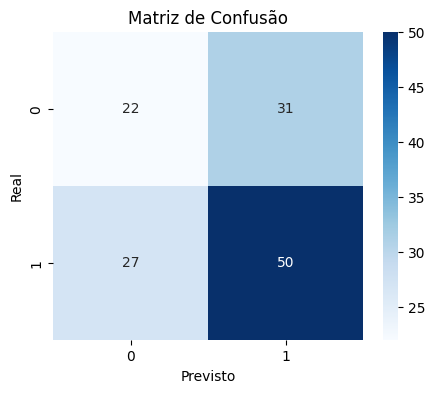

In [ ]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinar modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Avaliação
y_pred = modelo.predict(X_test)

print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))
print('Acurácia:', round(accuracy_score(y_test, y_pred), 3))

# Matriz de confusão
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


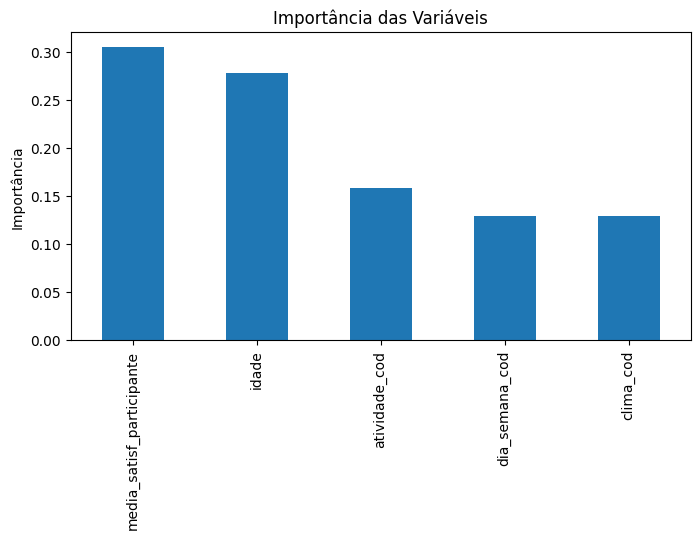

,0
media_satisf_participante,0.304922
idade,0.277800
atividade_cod,0.158555
dia_semana_cod,0.129400
clima_cod,0.129323


In [ ]:
importances = pd.Series(modelo.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,4))
importances.plot(kind='bar', title='Importância das Variáveis')
plt.ylabel('Importância')
plt.show()

importances


In [ ]:
# Gerar previsões para o dataset completo (exemplo de aplicação)
df['prob_falta'] = 1 - modelo.predict_proba(X)[:,1]

# Selecionar última observação de cada aluna (simulação da "próxima aula")
previsoes = df[['id_participante', 'atividade', 'clima', 'data', 'prob_falta']]
previsoes_agrupadas = previsoes.groupby('id_participante').tail(1).sort_values('prob_falta', ascending=False)

# Mostrar top 10 alunas com maior probabilidade de faltar
previsoes_agrupadas.head(10)


,id_participante,atividade,clima,data,prob_falta
233,9,Ginástica,Nublado,2025-09-29,0.704976
51,2,Ginástica,Nublado,2025-09-29,0.640692
389,15,Ginástica,Nublado,2025-09-29,0.476014
311,12,Ginástica,Nublado,2025-09-29,0.416119
77,3,Ginástica,Nublado,2025-09-29,0.406500
129,5,Ginástica,Nublado,2025-09-29,0.371690
25,1,Ginástica,Nublado,2025-09-29,0.351460
155,6,Ginástica,Nublado,2025-09-29,0.341048
363,14,Ginástica,Nublado,2025-09-29,0.318452
207,8,Ginástica,Nublado,2025-09-29,0.318310
